In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
run src/preprocessing.py

In [3]:
numeric_gelman_categorical_significant = pd.merge(numeric_log_gel_sc_out_rem_df, 
                                                  categorical_encoded_features_significant_variance_centered_out_rem,
                                                  left_index=True, right_index=True)

In [4]:
from sklearn.decomposition import PCA
pca_log_std_sc_out_rem = PCA()
pca_log_gel_sc_out_rem = PCA()
pca_num_gel_cat = PCA()

pca_log_std_sc_out_rem.fit(numeric_log_std_sc_out_rem_df)
pca_log_gel_sc_out_rem.fit(numeric_log_gel_sc_out_rem_df)
pca_num_gel_cat.fit(numeric_gelman_categorical_significant)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

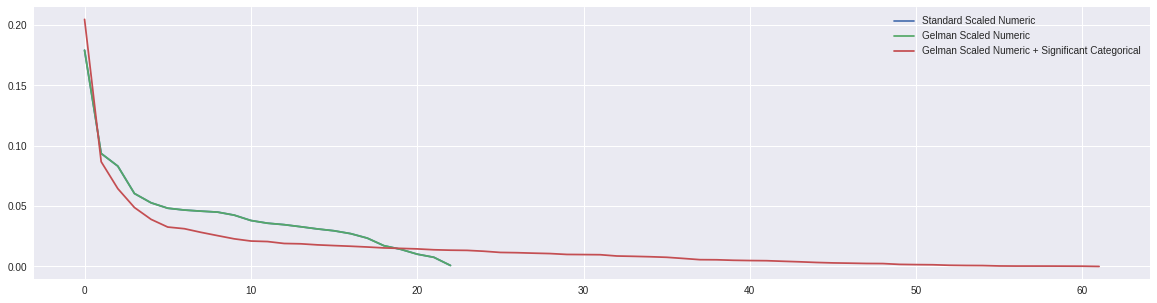

In [5]:
plt.figure(figsize=(20,5))#standard and gelman scaled are the same. Same effect on PCA. 
plt.plot(pca_log_std_sc_out_rem.explained_variance_ratio_, label='Standard Scaled Numeric')
plt.plot(pca_log_gel_sc_out_rem.explained_variance_ratio_, label='Gelman Scaled Numeric')
plt.plot(pca_num_gel_cat.explained_variance_ratio_, label='Gelman Scaled Numeric + Significant Categorical')
plt.legend()

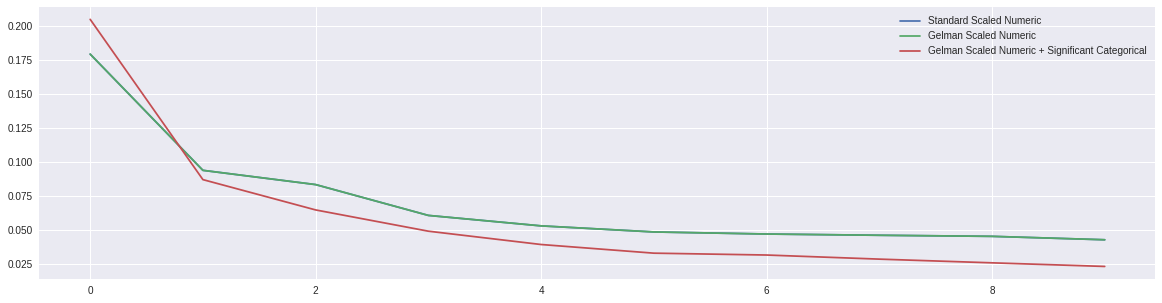

In [6]:
plt.figure(figsize=(20,5))
plt.plot(pca_log_std_sc_out_rem.explained_variance_ratio_[:10], label='Standard Scaled Numeric')
plt.plot(pca_log_gel_sc_out_rem.explained_variance_ratio_[:10], label='Gelman Scaled Numeric')
plt.plot(pca_num_gel_cat.explained_variance_ratio_[:10], label='Gelman Scaled Numeric + Significant Categorical')
plt.legend()

In [7]:
pca_log_std_sc_out_rem = PCA(8)
pca_log_gel_sc_out_rem = PCA(8)
pca_num_gel_cat = PCA(8)

pca_log_std_sc_out_rem.fit(numeric_log_std_sc_out_rem_df)
pca_log_gel_sc_out_rem.fit(numeric_log_gel_sc_out_rem_df)
pca_num_gel_cat.fit(numeric_gelman_categorical_significant)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
L_log_std_sc_out_rem = pca_log_std_sc_out_rem.explained_variance_ratio_
L_log_gel_sc_out_rem = pca_log_gel_sc_out_rem.explained_variance_ratio_
L_num_gel_cat = pca_num_gel_cat.explained_variance_ratio_

In [9]:
P_log_std_sc_out_rem = pd.DataFrame(pca_log_std_sc_out_rem.components_, columns=numeric_log_std_sc_out_rem_df.columns)
P_log_gel_sc_out_rem = pd.DataFrame(pca_log_gel_sc_out_rem.components_, columns=numeric_log_gel_sc_out_rem_df.columns)
P_num_gel_cat = pd.DataFrame(pca_num_gel_cat.components_, columns=numeric_gelman_categorical_significant.columns)

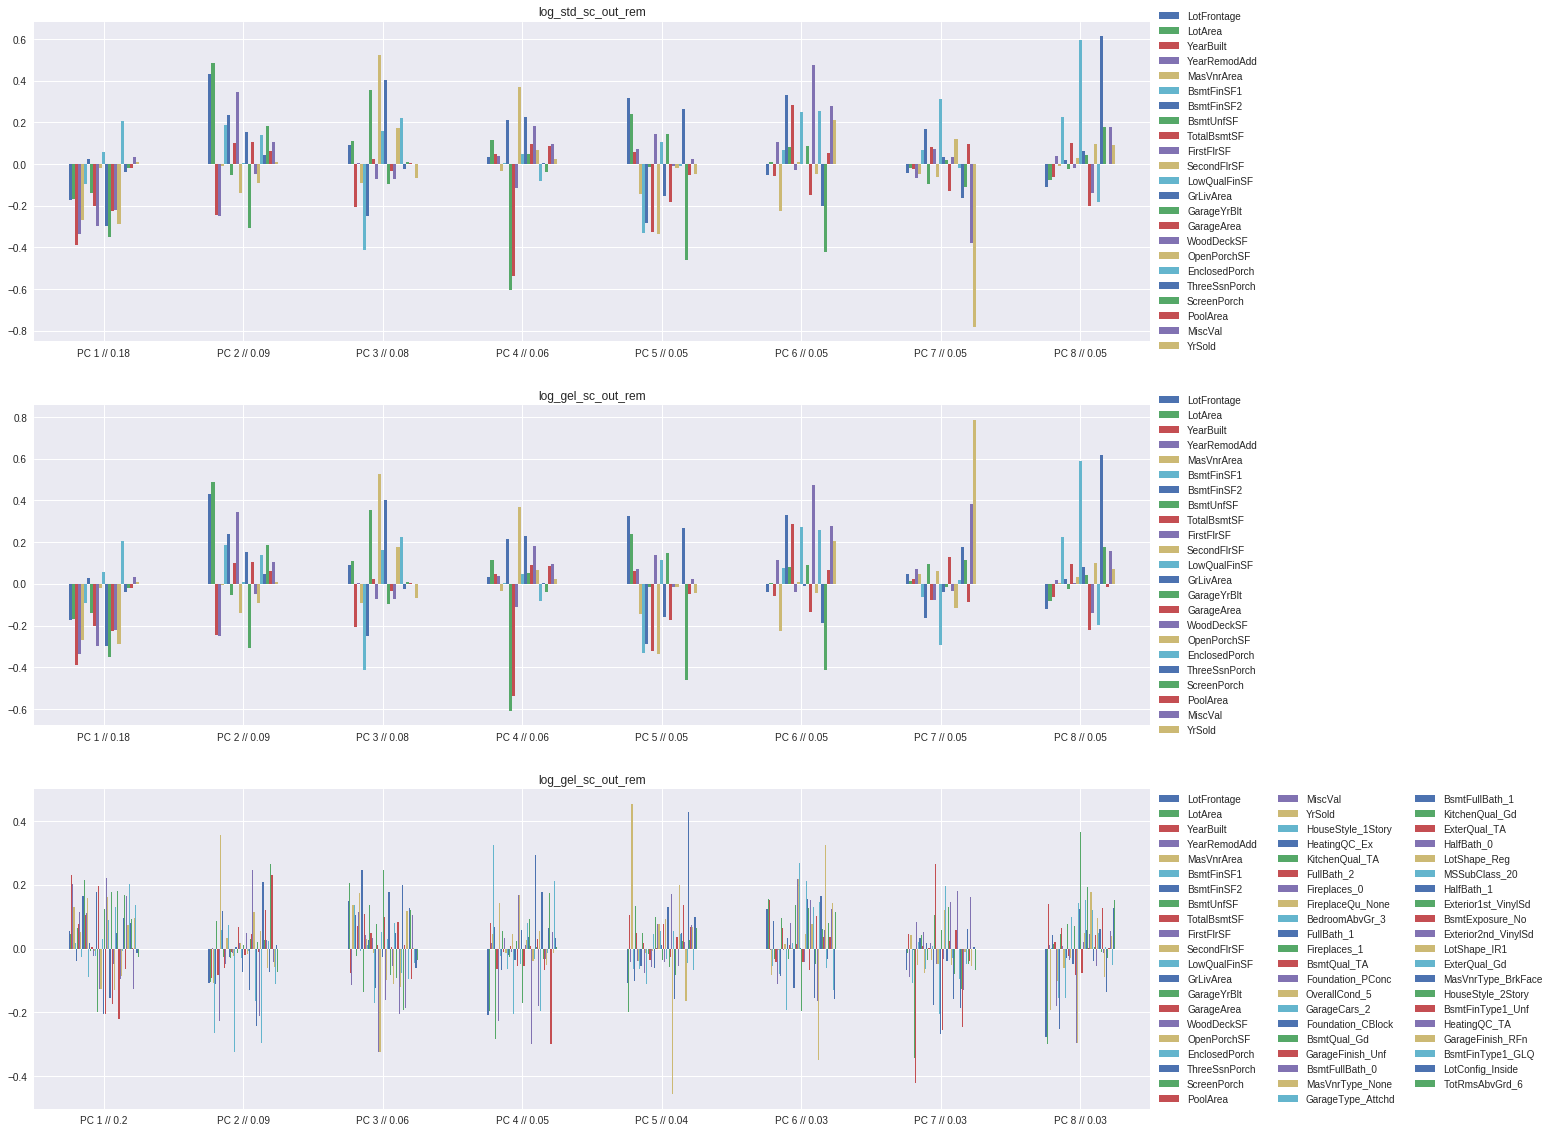

In [10]:
_, ax = plt.subplots(3,1,figsize=(20,20))
P_log_std_sc_out_rem.plot(kind='bar', rot=0, title="log_std_sc_out_rem", ax=ax[0]); 
P_log_gel_sc_out_rem.plot(kind='bar', rot=0, title="log_gel_sc_out_rem", ax=ax[1])
P_num_gel_cat.plot(kind='bar', rot=0, title="log_gel_sc_out_rem", ax=ax[2])

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), mode='expand')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), mode='expand')
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)

ax[0].set_xticklabels(['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(L_log_std_sc_out_rem)])
ax[1].set_xticklabels(['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(L_log_gel_sc_out_rem)])
ax[2].set_xticklabels(['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(L_num_gel_cat)]);

In [11]:
#calculate top feature using abs value. 
P_num_gel_cat_abs = P_num_gel_cat.abs()

def top_20_features_by_PC_abs(pc_num):
    PC_0_abs_sorted_index = P_num_gel_cat_abs.T.sort_values(pc_num, ascending=False).index
    PC_0_abs_sorted_index
    return P_num_gel_cat[PC_0_abs_sorted_index].T[pc_num].head(20)

In [12]:
top_20_features_by_PC_abs(0)
#correspondence. first correspondence, corresponds with nice houses. PC1 is nice houses by looking at the the results. 

YearBuilt              0.231171
Foundation_PConc       0.220654
ExterQual_TA          -0.219245
GarageYrBlt            0.215008
BsmtQual_TA           -0.205763
FullBath_1            -0.203895
ExterQual_Gd           0.203885
YearRemodAdd           0.203380
KitchenQual_TA        -0.200140
FullBath_2             0.197584
KitchenQual_Gd         0.179558
BsmtQual_Gd            0.177149
HeatingQC_Ex           0.176087
GarageFinish_Unf      -0.174514
Exterior1st_VinylSd    0.167227
Exterior2nd_VinylSd    0.165341
GrLivArea              0.163569
OverallCond_5          0.160344
OpenPorchSF            0.159883
Foundation_CBlock     -0.156131
Name: 0, dtype: float64

In [13]:
top_20_features_by_PC_abs(1)
#correspondence with 2-story houses. PC2 is 2 story houses. 

SecondFlrSF          0.356669
HouseStyle_1Story   -0.324960
MSSubClass_20       -0.294241
HouseStyle_2Story    0.266056
BsmtFinSF1          -0.263216
BsmtFullBath_0       0.246357
BsmtFullBath_1      -0.240937
BsmtFinType1_Unf     0.231034
FirstFlrSF          -0.227576
HalfBath_0          -0.211507
HalfBath_1           0.208740
GarageType_Attchd   -0.164694
Foundation_CBlock   -0.130606
BsmtExposure_No      0.119563
GrLivArea            0.118326
MasVnrType_None      0.114192
BsmtFinType1_GLQ    -0.112201
BsmtFinSF2          -0.110443
LotFrontage         -0.108912
MasVnrArea          -0.106453
Name: 1, dtype: float64

In [14]:
top_20_features_by_PC_abs(2) #PCA3 corresponds to nice houses. Unsupervised. didnt even touch sale price yet. 

FireplaceQu_None      -0.323884
Fireplaces_0          -0.323884
GrLivArea              0.247062
Fireplaces_1           0.245131
LotArea                0.205019
HalfBath_0            -0.204651
HalfBath_1             0.198824
Exterior1st_VinylSd   -0.190895
Exterior2nd_VinylSd   -0.187607
Foundation_CBlock      0.178607
SecondFlrSF            0.175694
HouseStyle_1Story     -0.168986
Foundation_PConc      -0.161428
LotFrontage            0.148060
ScreenPorch            0.137863
MasVnrArea             0.135752
BsmtFinSF1             0.135737
GarageYrBlt           -0.135117
MasVnrType_BrkFace     0.127890
HeatingQC_Ex          -0.122570
Name: 2, dtype: float64

In [15]:
numeric_log_std_sc_out_rem_pca_df = pd.DataFrame(pca_log_std_sc_out_rem.transform(numeric_log_std_sc_out_rem_df),
                                                 columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8'])
numeric_gelman_categorical_significant_pca = pd.DataFrame(pca_num_gel_cat.transform(numeric_gelman_categorical_significant),
                                                 columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8'])
#using pca data to augment the dataset. Basically adding PC1, PC2 into our features. 

In [16]:
numeric_log_std_sc_out_rem_pca_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8
0,-1.522382,-1.316249,0.176919,0.801532,-0.692247,-0.752192,-0.199789,0.269315
1,-0.052177,0.638297,-1.156410,-0.479503,0.481992,0.553020,0.591952,-0.461565
2,-1.703013,-0.858533,0.540155,0.483581,-0.506557,-0.698896,-0.276411,0.150803
3,1.321412,0.366885,2.114732,-0.032548,-0.486271,0.185651,1.077961,-0.487281
4,-2.950954,-0.051823,0.757327,0.896242,-0.422520,0.159850,-0.154973,-0.183611
5,-0.896853,0.602316,-0.257956,1.891311,2.512819,0.168126,-4.083350,6.198614
6,-2.993757,0.012117,-1.039541,-0.328004,0.281816,0.229127,0.720478,-0.183504
7,-0.588267,1.582534,0.942266,1.543176,-1.459223,2.987185,-2.016502,0.388966
8,2.786280,0.480947,2.463647,-0.372451,-0.778942,0.988546,-0.285169,-1.140397
9,2.524792,0.583833,-0.968190,-0.864419,-0.328724,-0.496770,0.202729,0.196045
